# **NumPy**

1. Array creation & data types
1. Universal functions: vectorized ops
1. Basic manipulations: indexing, slicing, boolean mask, fancy index, etc.
1. Broadcast: vectorized ops on arrays with different shapes

Nature article: https://www.nature.com/articles/s41586-020-2649-2.pdf

##### Package installation

In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas

In [2]:
import numpy as np

np.__version__

'1.18.5'

### Why numpy array?
* **Array**: collection of items, with the **same data type**
* Save computational time and memory space 
    * Python list is slower and take up more space
* Vectorized operations: write lesser for-loops
* Extremely popular, data exchange for different pacakges
* Linear algebra operations

### Numpy is faster than list

In [3]:
# 1) compute double-list using list [SLOWER]
num = 100000
douleOld = [x*2 for x in range(num)] # list method

# 2) compute double-list using numpy array [FASTER]
# arr = np.arange(num)
arr = np.array(range(num))
# douleNew = arr + arr
douleNew = arr * 2

# ms - millisecond 毫秒
# µs - microsecond 微秒
# ns - nanoseconds 奈秒

# is it the same?
# douleOld == douleNew
# (douleOld == douleNew).all()

---
## 1) **Array creation & data types**

### Basic Operations

In [4]:
# 1d array
data = np.arange(1000)
data

# basic operations
data.ndim # dimension: 1
data.shape # shape 
data.dtype
data.strides
# len(data)

data.strides # 步長, (4,) => skip 4 byte to next item in this dimension

(4,)

In [5]:
# 2d array
np.random.seed(1) # make sure we saw the same random values
data = np.random.randn(2,3)
data
# data
# data.ndim
# data.dtype # float64 -> 8bytes
# len(data)
# data.strides # (24,8) => skip 24 / 8 byte to next item in this dimension

# format the output
# np.set_printoptions(precision=8,suppress=True)
# np.set_printoptions?

# pandas based on numpy

# please install pandas first
# import pandas as pd
# df = pd.DataFrame(data)
# url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv'
# tips = pd.read_csv(url)   # tips dataset
# tips.values


array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ]])

### Creating ndarray

1. np.array()
1. np.arange()
1. np.zeros()
1. np.ones()
1. np.empty()
1. np.full()
1. np.eye() / np.identity()
1. np.random.random() / np.random.randint()
1. np.linspace()

In [6]:
# method 1: list
np.array([[1,2],[3,4],])

array([[1, 2],
       [3, 4]])

In [7]:
# method 2: np.arange(start, stop, step, dtype)
np.arange(10,100, 3, dtype='float')
np.arange(100).reshape(10,10) # reshape() to change the shape

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [8]:
# method 3: np.zeros(shape, dtype)
# data = np.zeros(5)
data = np.zeros((2,3))
# data = np.zeros([2,3])
data
# data.shape

array([[0., 0., 0.],
       [0., 0., 0.]])

In [9]:
# method 4: np.ones(shape, dtype)
# data = np.ones((2,3), 'object')
np.ones([2,3], 'object')

array([[1, 1, 1],
       [1, 1, 1]], dtype=object)

In [10]:
# method 5: np.empty()
np.empty(10) # no init, but faster


array([1.31045749e-311, 1.77863633e-322, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 4.75732178e-038, 1.14199372e-071, 5.45502329e-090,
       1.48999169e+161, 4.67404806e-315])

In [11]:
# method 6: np.full(shape, fill_value)
np.full([2,3], 9.9) # filled by 9.9

array([[9.9, 9.9, 9.9],
       [9.9, 9.9, 9.9]])

In [12]:
# method 7: np.eye(N) / np.identity(N)
# np.eye
np.eye(5)

# np.identity
# np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [13]:
# method 8a: np.random.random(shape)
np.random.random((3,3))

array([[0.41919451, 0.6852195 , 0.20445225],
       [0.87811744, 0.02738759, 0.67046751],
       [0.4173048 , 0.55868983, 0.14038694]])

In [14]:
# method 8b: np.random.randint(low, high, shape)
np.random.randint(0, 100, (3,3))

array([[96, 86, 13],
       [ 9,  7, 63],
       [61, 22, 57]])

In [15]:
# method 9: np.linspace(start, stop, num)

np.linspace(0, 1, 10) # from 0 to 1, split into 10 equal parts

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

### Data types (dtype)
* https://numpy.org/doc/stable/user/basics.types.html

**Some facts:**
* 1 byte = 8 bits
* signed -> positive, negative, 0
* unsigned -> positive, 0

**Type codes for the following types:**
1. int
1. float
1. bool
1. object
1. string
1. unicode


##### Create array using **Type codes**

In [16]:
# Type code
# 1) int
#  i1  -> signed 8bit int, Type: int8 
#  i2  -> signed 16bit int, Type: int16
#  i4  -> signed 24bit int, Type: int32
#  i8  -> signed 64bit int, Type: int64

# u1,u2,u4,u8 -> unsigned int (uintX)

# 2) float
#  f2  -> 16bit floating point, Type: float16
#  f4  -> 32 bit floating point, Type: float32
#  f8  -> 64 bit floating point, Type: float64

# 3) bool
#  ?  -> True OR False, Type: bool

# 4) object
#  O  -> python object, Type: object

# 5) string
#  S  -> Fixed-length ASCII char, S4 -> 4 ASCII characters, Type: string_

# 6) unicode
#  U  -> Fixed-length Unicode, Type: unicode_

dt = np.dtype('i2')
# dt

dt.byteorder

data = np.array([0,-1,2,3,4], dtype=dt)
data


array([ 0, -1,  2,  3,  4], dtype=int16)

##### **Create array using np data types (not type code here)**

In [17]:
# data = np.arange(10, dtype=np.int8) # 8bit integer
data = np.arange(10, dtype=np.int16) # 16bit integer
# data = np.arange(10, dtype=np.float64) # 64bit floating point

# data = np.array([0,-1,2,3,4], dtype=np.bool) # zero is False, non-zero is True
data = np.array([0,-1,2,3,4, 99999999], dtype=np.string_) # fixed length string, b: byte
                
# data
data

# Byte order
# https://numpy.org/doc/stable/reference/generated/numpy.dtype.byteorder.html
# (>) big-endian (low to high)
# (<) little-endian (high to low)
# (|) not applicable

# S is single byte - always |

array([b'0', b'-1', b'2', b'3', b'4', b'99999999'], dtype='|S8')

##### **Changing array dtype after creation**

In [18]:
data = np.array([0,-1,2,3,4, 11112222], dtype=np.string_)

# data.astype('?') # to boolean
# data.astype('i4') # to int32
data.astype('|S10')


array([b'0', b'-1', b'2', b'3', b'4', b'11112222'], dtype='|S10')

---

## 2) **Universal functions: vectorized ops**

### Vectorized Computations

In [19]:
data = np.arange(1, 11, dtype=np.int16) # 16bit integer
data

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int16)

In [20]:
data + data # same shape
# np.add(data, data)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20], dtype=int16)

In [21]:
data - 1
# np.subtract(data, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)

In [22]:
data * 2
np.multiply(data,2) # element-wise

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20], dtype=int16)

In [23]:
data * data # same shape
# np.multiply(data, data) # element-wise

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int16)

In [24]:
1/data
# np.divide(1, data)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ])

In [25]:
data**2
np.square(data)

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int16)

### **Universal Functions (ufunc)**
* perform **element-wise operations** on ndarray
* vectorized computations listed above are all ufuncs
* Some ufuncs:
    1. np.add, np.substract, np.negative
    1. np.multiply, np.divide
    1. np.power
    1. np.mod
    1. np.maxiumn, np.minimum
    1. np.square, np.sqrt
    1. np.exp
    1. np.log, np.log10, np.log2, np.log1p
    1. np.isnan
    1. np.sin, np.cos, np.tan
    1. np.greater, np.greater_equal
    1. np.less, np.less_equal
    1. np.equal, np.not_equal

In [26]:
np.random.seed(1)
arr1 = np.array([-1,2,3,4,5])
arr2 = np.array([2,0,7,-1,8])

np.maximum(arr1, arr2)

array([2, 2, 7, 4, 8])

In [27]:
arr1 = np.array([-1,2,3,4,5])
abs(arr1) # python abs func, np array can work with some native funcs
np.abs(arr1) # np.abs 

# for performance reason, always use np version first

array([1, 2, 3, 4, 5])

In [28]:
arr1 = np.array([1,2,3,4,5])
np.square(arr1)
# np.sqrt(arr1)

array([ 1,  4,  9, 16, 25], dtype=int32)

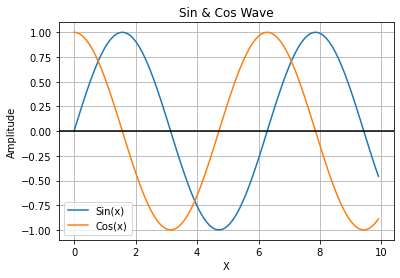

In [29]:
x = np.arange(10, step=0.1) 
s = np.sin(x)
c = np.cos(x)

# plot it
import matplotlib.pyplot as plot
plot.grid(True) 
plot.plot(x, s) # sin
plot.plot(x, c) # cos
plot.legend(['Sin(x)','Cos(x)'])

plot.title('Sin & Cos Wave')
plot.xlabel('X')
plot.ylabel('Amplitude')

plot.axhline(color='black')

In [30]:
arr1 = np.array([1,2,3,4,5]) 
# arr1 > 3 # it's ufunc too
# np.greater(arr1,3)

---

### Aggregate functions

In [31]:
data = np.arange(1,10) 

# numerical array only, not work for string!
data.mean()
# np.mean(data)
# data.sum()
# data.max()
# data.min()
# data.argmin() # index val for min item
# data.argmax() # index val for max item

# reduction - aggregate all values in a single array
# np.add.reduce(data) 
# np.sum(data)

# accumulate - aggregate all values in a single array, and keep the intermediate results
# np.add.accumulate(data)
# np.cumsum(data)

5.0

### Cumulative functions

In [32]:
data = np.arange(1,10) 

# cumulative results
data.cumsum()
# data.cumprod()

# data = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
# data.cumsum(axis=1) # left-right
# data.cumsum(axis=0) # top-down

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45], dtype=int32)

---
## 3) **Basic manipulations**

### Index & Slice

In [33]:
# 1d examples
arr = np.arange(10)

# indexing[pos]
arr[0] = 999  # arr[pos] to index a item and then update it
# arr[0] # use arr[pos] to get a value
# arr[0] = 'abc' # wrong, can't assign a different type

# slicing
# arr[:]  # all
# arr[1:3] # pos 1,2, stop at pos 3
# arr[::-1] # reverse order
# arr[::2] # step size 2

# WARNING
# view = arr[1:4]
# view[:] = [777,888,999] # Update on this view also update the original array

# copy = arr[1:4].copy() # if you don't want to update thr original array
# copy[:] = [777,888,999]

In [34]:
# 2d examples
arr2d = np.arange(16).reshape(4,4)
# array([[ 0,  1,  2,  3],
#        [ 4,  5,  6,  7],
#        [ 8,  9, 10, 11],
#        [12, 13, 14, 15]])

# indexing [row][col] OR [row, col]
# arr2d[0][0] # 0
# arr2d[1][2] # 6
# arr2d[1, 2] # 6 

# slicing[row, col]
# arr2d[1] # row 1
# arr2d[1:3] # row 1, 2
# arr2d[1:3, 1:3] # center parts

# update examples
# arr2d[1:3, 1:3] = np.full([2,2], -1)
# arr2d

In [35]:
# increase dimension
arr = np.arange(10) # 1d

arr[np.newaxis, :] # to 2d (aad new row)
# arr[:, np.newaxis] # to 2d (add new col)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

### Boolean Mask

In [36]:
animals = np.array(['cat', 'dog', 'fish', 'duck', 'cat'])
np.unique(animals)

animals == 'cat' # return a boolean mask
animals[ animals == 'cat' ] # select records 

np.random.seed(1)
data = np.random.randint(1,100, [5,5]) # assume this data is associcated with animals
# data
# data[animals == 'cat'] # cat records
# data[~(animals == 'cat')] # non-cat records
# data[animals != 'cat'] # non-cat records
# data[(animals == 'cat') | (animals == 'dog')] # cat OR dogs 
# data[(animals == 'cat') & (animals == 'dog')] # cat AND dogs (nothing)

# data[data>30] # select all items > 30
# data[data>30] = -1 # assign values 

# any / all function
# (data>30).any() # any T?
# (data>30).all() # all T?
# (data>30).sum() # count of item > 30

### Sorting

In [37]:
arr = np.array([4,54,2,6,8,-1,0]) 
arr.sort()
arr
# np.sort(arr) # sorted now
# np.sort(arr)[::-1] # reverse order

# np.random.seed(1)
# arr2d = np.random.randn(3, 3)
# arr2d
# arr2d.sort(axis=0) # sort by each columns
# arr2d.sort(axis=1) # sort by each row
# arr2d


array([-1,  0,  2,  4,  6,  8, 54])

### Fancy Index

In [38]:
animals = np.array(['cat', 'dog', 'fish', 'duck']) 

# animals[[0,1]] # cat, dog
# animals[[-1,1]] # duck, dog
# animals[[1,1,1]] # dog, dog, dog


### Transpose

In [39]:
arr2d = np.arange(16).reshape(4,4)
arr2d
arr2d.T # transpose

arr2d.swapaxes(0,1)

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

### Concatenate & Split

In [40]:
arr1 = np.arange(16).reshape(2,8)
arr2 = arr1 + 10

# np.concatenate([arr1, arr2], axis=0) # vertically
# np.vstack([arr1, arr2]) # 2 dim
# np.row_stack([arr1, arr2])

# np.concatenate([arr1, arr2], axis=1) # horizontally
# np.hstack([arr1, arr2])
# np.column_stack([arr1, arr2])

# arr1
# array([[ 0,  1,  2,  3,  4,  5,  6,  7],
#        [ 8,  9, 10, 11, 12, 13, 14, 15]])
# arrayList = np.split(arr1, [1,3,5], axis=1) # it is a list of ndarray
# type(arrayList[0])

##### Stack helpers: **np.r_** & **np.c_**

In [41]:
arr1 = np.arange(16).reshape(2,8)
arr2 = arr1 + 10

# np.r_[arr1, arr2] # row stack
np.c_[arr1, arr2] # col stack
# np.c_[ np.r_[arr1, arr2], np.r_[arr1, arr2] ] # nested example

# can also accept slice OR list to create arrays
# np.c_[:10] # vertically 
# np.c_[10:0:-1] # vertically, reverse order
# np.r_[:10] # horizontally

# slice with different columns
# np.c_[1:5, 6:10, 11:15]

array([[ 0,  1,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 23, 24, 25]])

### File I/O

In [42]:
# BINARY FILES
arr = np.arange(20)
filename = 'my_arr'

# save ndarray to a file
# np.save(filename, arr)

# load ndarray from a file
# np.load(f'{filename}.npy')

# compress and save multiple arrays to a file
# np.savez_compressed(filename, arr1=arr, arr2=np.arange(10)) # data is the key, it could be any keys
# tmp = np.load(f'{filename}.npz')
# tmp['arr1']
# tmp['arr2']

In [43]:
# load array from plain text file (npy and npz files are binary)
data = np.loadtxt('load.txt', dtype=np.int32) # load from text file
data

# save to text file
np.savetxt('save.txt', data) # save to a plain text file

##### Read CSV

In [44]:
data = np.genfromtxt("tips.csv", delimiter=',', skip_header=1, encoding='UTF-8')
data

# or you can use pandas's  pd.read_csv(filename) to read it
# please refer to pandas lessons

array([[16.99,  1.01,   nan, ...,   nan,   nan,  2.  ],
       [10.34,  1.66,   nan, ...,   nan,   nan,  3.  ],
       [21.01,  3.5 ,   nan, ...,   nan,   nan,  3.  ],
       ...,
       [22.67,  2.  ,   nan, ...,   nan,   nan,  2.  ],
       [17.82,  1.75,   nan, ...,   nan,   nan,  2.  ],
       [18.78,  3.  ,   nan, ...,   nan,   nan,  2.  ]])

### Linear Algebra

1. np.dot
1. np.diag
1. np.linalg.det
1. np.linalg.eig
1. np.linalg.inv
1. np.linalg.solve, etc.

##### dot product
* https://www.mathsisfun.com/algebra/matrix-multiplying.html

In [45]:
a = np.array([[1,2,3], [4,5,6]])
b = np.array([[7,8],[9,10],[11,12]])

np.dot(a, b)
# a.dot(b)

array([[ 58,  64],
       [139, 154]])

##### determinant
* https://www.mathsisfun.com/algebra/matrix-determinant.html

In [46]:
X = np.array([[6,1,1],[4,-2,5], [2,8,7]])
np.linalg.det(X)

-306.0

##### inverse
* https://www.mathsisfun.com/algebra/matrix-inverse.html

In [47]:
np.random.seed(1)
X = np.random.rand(3,3)
np.linalg.inv(X)

array([[-0.41754508,  4.53348342, -1.05494467],
       [ 1.63018954, -2.6246232 ,  0.61035135],
       [-1.2237834 ,  0.157672  ,  2.48402609]])

##### diagonal

In [48]:
a = np.arange(9).reshape((3,3))
np.diag(a)

array([0, 4, 8])

##### solve linear matrix equations

> x + y + z = 6 <br>
> 2y + 5z = −4 <br>
> 2x + 5y − z = 27<br>
    
* https://www.mathsisfun.com/algebra/systems-linear-equations-matrices.html

In [49]:
A = [[1,1,1], [0,2,5], [2,5,-1]]  
B = [6, -4, 27]

np.linalg.solve(A, B)
# np.linalg.inv(A).dot(B)

array([ 5.,  3., -2.])

---

## 4) **Broadcast: vectorized ops on arrays with different shapes**

### **Broadcast**
* Doing arithmetics with arrays in **different shapes**

* Examples and diagrams are extracted from NumPy official websites:
    * https://numpy.org/doc/stable/user/basics.broadcasting.html
    * https://numpy.org/devdocs/user/theory.broadcasting.html 

##### Arrays with **same shape** -> **element-wise** computations

In [50]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0]) # all 2 here

a * b # element-wise multiplication -> the shape of a & b are the same

array([2., 4., 6.])

##### Arrays **NOT** in **same shape**
**CASE 1.** One of them is a **scalar** (number)

1. The **smaller array** must **stretch** to match the shape of the **larger array**
1. After matching the shape -> **element-wise** computations

In [51]:
a = np.array([1.0, 2.0, 3.0])
b = 2 # b is a scalar now

a * b # since shape not match -> broadcasting (b stretch to match A - conceptually) -

array([2., 4., 6.])

![ndarray with a scalar](https://numpy.org/devdocs/_images/theory.broadcast_1.gif)

Source: https://numpy.org/devdocs/user/theory.broadcasting.html

**CASE 2**. Both of them are arrays but **shape** are different

> **RULE**: In order to broadcast, the size of the **trailing axes** for both arrays in an operation **must either be the same size** or **one of them must be one**.

In [52]:
a = np.array([[ 0.0,  0.0,  0.0],
            [10.0, 10.0, 10.0],
            [20.0, 20.0, 20.0],
            [30.0, 30.0, 30.0]])
b = np.array([0, 1.0, 2.0])
# b = np.array([[0, 1.0, 2.0],
#               [0, 1.0, 2.0],
#               [0, 1.0, 2.0],
#               [0, 1.0, 2.0]])
a + b
# a.shape # (4, 3)
# b.shape # (3,)

#######################
# Broadcast rule check
#######################
# (4, 3) 
# (3,)

# step 1: smaller array -> append 1 on LHS (increase the dimension)
# (4, 3) => (4, 3) # no change
# (3,)   => (1, 3) # append 1 to the left 

# Conclusion => Compatible

# step 2: stretch on ALL 1s to match the larger array
# (4, 3) => (4, 3) # no change
# (3,)   => (1->4, 3) # 1 stretch to 4

# step 3: if there is a match in shape, do element-wise computations with the new arrays
# (4, 3) 
# (4, 3)

array([[ 0.,  1.,  2.],
       [10., 11., 12.],
       [20., 21., 22.],
       [30., 31., 32.]])

![Broadcast](https://numpy.org/devdocs/_images/theory.broadcast_2.gif)

Source: https://numpy.org/devdocs/user/theory.broadcasting.html

<font color=red>**Incompatible**.</font> Cannot do broadcasting

In [53]:
a = np.array([[ 0.0,  0.0,  0.0],
            [10.0, 10.0, 10.0],
            [20.0, 20.0, 20.0],
            [30.0, 30.0, 30.0]])
b = np.array([1.0, 2.0, 3.0, 4.0])

#######################
# Broadcast rule check
#######################
# (4, 3) => 
# (4,)   => trailing axes is not the same size AND not 1
# even though I increase the dimension and add 1 to LHS, 4 did not match with 3 (trailing axes not equal AND not one)
# Conclusion => incompatible 

# a + b # value Error => incompatible shape for broadcasting

![Broadcast](https://numpy.org/devdocs/_images/theory.broadcast_3.gif)

Source: https://numpy.org/devdocs/user/theory.broadcasting.html

In [54]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([0.0, 1.0, 2.0])

a.shape # (4,)
b.shape # (3,)

a[:,np.newaxis] # shape => (4, 1)
# array([[ 0.],
#        [10.],
#        [20.],
#        [30.]])
a[:,np.newaxis] + b

#######################
# Broadcast rule check
#######################
# (4, 1) => trailing axes is 1
# (4, 1) => (4, 1->3) # stretch 1 to 3 to match the other array
# (3,)   => # this 3 is matching with the previous array's 3 after stretching
# Conclusion => Compatible

# (4, 1->3) => (4, 3)
# (3,)      => (1, 3) # append 1 on the LHS to increase dimension
# (3,)      => (1->4, 3) # stretch 1 to 4 to match the other array


array([[ 0.,  1.,  2.],
       [10., 11., 12.],
       [20., 21., 22.],
       [30., 31., 32.]])

![Broadcast](https://numpy.org/devdocs/_images/theory.broadcast_4.gif)

Source: https://numpy.org/devdocs/user/theory.broadcasting.html

In practice,
* one of the array could be very large
* since this process is conceptual only, it does not require so many memory

In [55]:
np.random.seed(1)
array = np.random.random([1000,5])
mean = array.mean(axis=0) # mean for each col

array - mean # 2 shapes are different, it is a broadcast

#######################
# Broadcast rule check
#######################
# (1000, 5)
# (5) 

# step 1: smaller array -> append 1 on LHS (increase the dimension)
# (1000, 5) => (1000, 5) # no change
# (5,)   => (1, 5) # append 1 to the left 

# Conclusion => Compatible
# (5,)   => (1->1000, 5) # append 1 to the left

# it is conceptual, you don't need (1000, 5) mean array to perform this operation!

array([[-0.07437682,  0.2164395 , -0.49488343, -0.20531374, -0.35683466],
       [-0.39906023, -0.31762478, -0.14943708, -0.11087884,  0.03522618],
       [-0.07220431,  0.1813345 , -0.29054556,  0.37047112, -0.47620296],
       ...,
       [ 0.36882738,  0.26911475,  0.28096933,  0.02105238, -0.05340519],
       [-0.26476733,  0.30479318,  0.47093129,  0.03588566,  0.3986169 ],
       [-0.20904838,  0.01387026, -0.16683522,  0.48415484, -0.2532739 ]])